In [1]:
import os
import sys
import numpy as np
# import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
# import cmocean
import xarray as xr
import seaborn as sns

def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
from matplotlib import rc,rcParams

# rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


In [3]:
# Determine where to look #
basedir = 'data'
# basedir = '/Users/dporter/Documents/Research/Projects/bedclass/data'



In [4]:
datadir = 'Bothwick'
# suffix = '.out'
# atm_suffix = '.dat'
infile = os.path.join(basedir, datadir, 'upper_thwaites_model_with_basins.csv')
df_borthwick = pd.read_csv(infile)
df_borthwick

,free_air_grav,sed_basin_1_0,psx,psy
0,-35.0,0.0,-1200000.0,-437000.0
1,-34.8,0.0,-1200000.0,-437000.0
2,-34.5,0.0,-1200000.0,-437000.0
3,-34.2,0.0,-1200000.0,-437000.0
4,-33.8,0.0,-1200000.0,-437000.0
...,...,...,...,...
454,-18.1,0.0,-1420000.0,-476000.0
455,-17.9,0.0,-1420000.0,-476000.0
456,-17.6,0.0,-1420000.0,-476000.0
457,-17.3,0.0,-1430000.0,-477000.0


In [5]:
# df_borthwick['Dist'] = 0
# for i in range(1, len(df_borthwick)-1):
# #     dfmax.remove(columnsn='Dist')
# #     print('{}, {}'.format(dfmax['LAT'].iloc[i-1], dfmax['LON'].iloc[i-1]))
# #     print('{}, {}'.format(dfmax['LAT'].iloc[i], dfmax['LON'].iloc[i]))
#     df_borthwick['Dist'].iloc[i] = get_distance_haversine((df_borthwick['LAT'].iloc[i-1],df_ross_max['LON'].iloc[i-1]),
#                                                   (df_borthwick['LAT'].iloc[i],df_ross_max['LON'].iloc[i]))
# #     print('Dist: {}'.format(dfmax['Dist'].iloc[i]))

# df_ross_max

# Read in lake locations

In [6]:
datadir = 'Bothwick'
# suffix = '.out'
# atm_suffix = '.dat'
infile = os.path.join(basedir, 'ASE_Muto_profile_sample.csv') #upper_thwaites_model_with_basins.csv')
df = pd.read_csv(infile)
df

,antgg_boug_bytens_meters_ASE#1_x,antgg_boug_bytens_meters_ASE#1_y,ASE_MagneticCompilation_Dziadeketal_250m#1_x,ASE_MagneticCompilation_Dziadeketal_250m#1_y,AntGG Bouguer anomaly (10km)#1_x,AntGG Bouguer anomaly (10km)#1_y,PISM_beta_log10_ASEclipped#1_x,PISM_beta_log10_ASEclipped#1_y,ais_dmdt_grounded#1_x,ais_dmdt_grounded#1_y,bedmachine_bedrock_roughness#1_x,bedmachine_bedrock_roughness#1_y,BedMachine bedrock#1_x,BedMachine bedrock#1_y
0,0,30,0.000000,151.264114,0,38.79999924,0,9.625907898,0,-0.643919408,0,25.48901367,0,-1088.068115
1,1069.256715,30,267.314179,153.212189,4277.026861,38.79999924,4277.026861,9.520107269,4277.026861,-0.620702922,534.6283577,38.26171875,534.6283577,-1108.081177
2,2138.513431,30,534.628358,153.869385,23432.24648,35.29999924,10662.10007,9.669208527,10662.10007,-0.611426473,1069.256715,48.5748291,1069.256715,-1120.460693
3,3207.770146,30,801.942536,155.320282,34480.344,24.29999924,17047.17327,9.728738785,17047.17327,-0.594729424,1603.885073,51.09216309,1603.885073,-1134.228516
4,4277.026861,30,1069.256715,156.555954,45528.44152,20.89999962,23432.24648,9.762233734,23432.24648,-0.576187551,2138.513431,49.84545898,2138.513431,-1160.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,,,228378.981400,-151.320358,,,,,,,,,,
891,,,228629.494300,-151.146255,,,,,,,,,,
892,,,228880.007100,-151.167191,,,,,,,,,,
893,,,229130.520000,-151.353577,,,,,,,,,,


In [7]:
# df.dtypes
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [8]:
def add_basin_locs():
    ax.axvspan(27, 37, alpha=0.5, color='goldenrod')
    ax.axvspan(80, 100, alpha=0.5, color='goldenrod')
    ax.axvspan(132, 142, alpha=0.5, color='goldenrod')
    ax.axvspan(152, 162, alpha=0.5, color='goldenrod')
    ax.axvspan(172, 192, alpha=0.5, color='goldenrod')

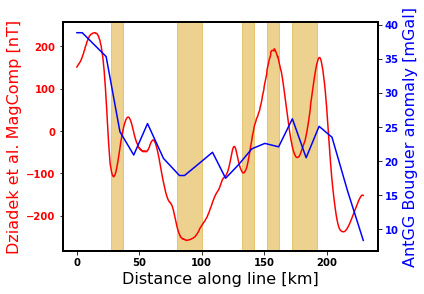

In [20]:
fig, ax = plt.subplots()

ax.plot(df['ASE_MagneticCompilation_Dziadeketal_250m#1_x']/1e3, df['ASE_MagneticCompilation_Dziadeketal_250m#1_y'], color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('Dziadek et al. MagComp [nT]', color='red', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
# plt.axvline(x=27, color="goldenrod", linestyle="--")
add_basin_locs()

ax3 = ax.twinx()
ax3.plot(df['AntGG Bouguer anomaly (10km)#1_x']/1e3, df['AntGG Bouguer anomaly (10km)#1_y'], color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_ylabel('AntGG Bouguer anomaly [mGal]', color='blue', fontsize=16)

plt.tight_layout()
plt.savefig('figs/lineplot_borthwickmuto_sample_potfields.pdf')

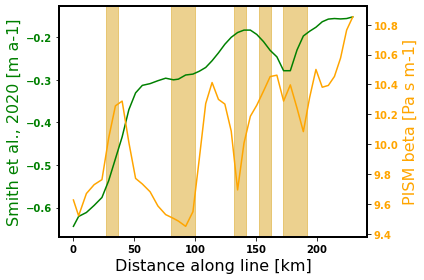

In [21]:
fig, ax = plt.subplots()

ax.plot(df['ais_dmdt_grounded#1_x']/1e3, df['ais_dmdt_grounded#1_y'], color='green')
ax.tick_params(axis='y', labelcolor='green')
ax.set_ylabel('Smith et al., 2020 [m a-1]', color='green', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
add_basin_locs()

ax4 = ax.twinx()
ax4.plot(df['PISM_beta_log10_ASEclipped#1_x']/1e3, df['PISM_beta_log10_ASEclipped#1_y'], color='orange')
ax4.tick_params(axis='y', labelcolor='orange')
ax4.set_ylabel('PISM beta [Pa s m-1]', color='orange', fontsize=16)

plt.tight_layout()
plt.savefig('figs/lineplot_borthwickmuto_sample_ICESATPISM.pdf')

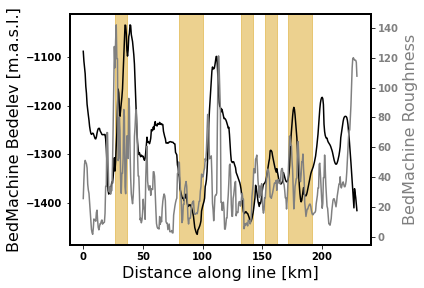

In [22]:
fig, ax = plt.subplots()

ax.plot(df['BedMachine bedrock#1_x']/1e3, df['BedMachine bedrock#1_y'], color='black')
ax.tick_params(axis='y', labelcolor='black')
ax.set_ylabel('BedMachine Bedelev [m.a.s.l.]', color='black', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
add_basin_locs()

ax2 = ax.twinx()
ax2.plot(df['bedmachine_bedrock_roughness#1_x']/1e3, df['bedmachine_bedrock_roughness#1_y'], 
         color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
ax2.set_ylabel('BedMachine Roughness', color='grey', fontsize=16)

plt.tight_layout()
plt.savefig('figs/lineplot_borthwickmuto_sample_BedMachine.pdf')